## Assignment 2: K-means and Hierarchical Clustering

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.cluster import KMeans
from itertools import cycle, islice

# Question 1 
## Part A

In [26]:
# Generate Datasets
n_samples = 100
random_state = 42

noisy_circles = make_circles(n_samples = n_samples, factor = 0.5, noise = 0.05)
noisy_moons = make_moons(n_samples = n_samples, noise = 0.05)
blobs = make_blobs(n_samples = n_samples, random_state = random_state)

# blobs with varied variances
varied = make_blobs(n_samples = n_samples, cluster_std=[1.0, 2.5, 0.5], random_state = random_state)

# Anistropicly distributed data
X, y = make_blobs(n_samples=n_samples, random_state = random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

## Part B

In [27]:
def fit_kmeans(dataset, num_clusters):
    X, y = dataset
    #normalize dataset using standard scaler
    X = StandardScaler().fit_transform(X)
    y_pred = KMeans(n_clusters = num_clusters, init = "random").fit_predict(X)
    return y_pred

## Part C

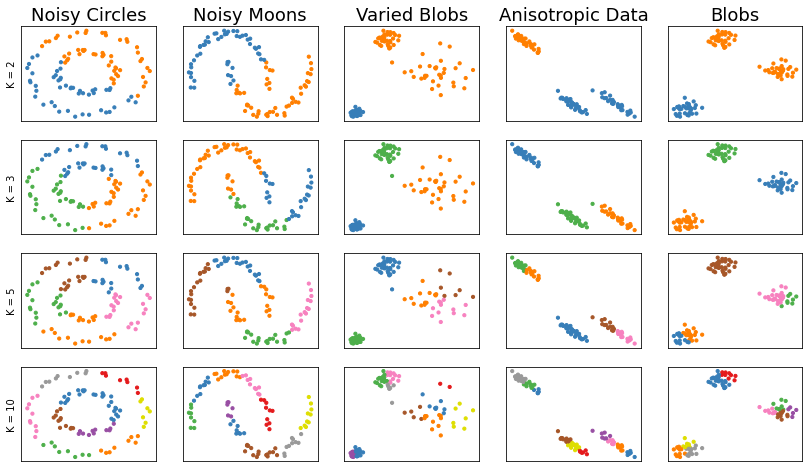

In [28]:
clusters = [2, 3, 5, 10]
datasets = (
    ("Noisy Circles", noisy_circles),
    ("Noisy Moons", noisy_moons),
    ("Varied Blobs", varied),
    ("Anisotropic Data", aniso),
    ("Blobs", blobs),
)
plt.figure(figsize = (14, 8))
plot_num = 1

for i, k in enumerate(clusters):
    for ds_name, ds in datasets:
        X, y = ds
        y_pred = fit_kmeans(ds, k)
        #Create necessary subplot size (4 x 5)
        plt.subplot(len(clusters), len(datasets), plot_num)
        #Add titles to top row only
        if i == 0:
            plt.title(ds_name, size = 18)
        
        # Points colored by predicted label
        # FROM https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        plt.xticks(())
        plt.yticks(())
        #Add y labels to 
        if plot_num in [1, 6, 11, 16]:
                plt.ylabel("K = %d" % k)
        plot_num += 1
        
plt.show()

## Part D

After repeating 1.C a few times, Noisy Circles and Noisy Moons are the most sensitive to the choice of initialization for the k = 2 or k = 3 cases.

# Question 2
## Part A

In [5]:
blobs_2 = make_blobs(center_box = (-20, 20), n_samples = 20, centers = 5, random_state = 12)

## Part B

In [6]:
def fit_kmeans(dataset, num_clusters):
    X, y = dataset
    #normalize dataset using standard scaler
    X = StandardScaler().fit_transform(X)
    kmeans = KMeans(n_clusters = num_clusters, init = "random").fit(X)
    
    #get the centroid of the cluster
    centroid = [X[kmeans.labels_ == i].mean(axis=0) for i in range(num_clusters)]
    sse = np.zeros(num_clusters)
    for point, label in zip(X, kmeans.labels_):
        sse[label] += np.sqrt(np.sum((point - centroid[label]) ** 2))
    return sse.mean()

## Part C

C:\Users\klion\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


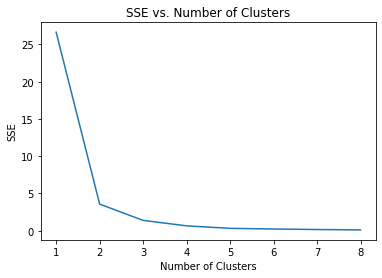

In [7]:
sse_clusters = [1, 2, 3, 4, 5, 6, 7, 8]
sse = []
for k in sse_clusters:
    sse.append(fit_kmeans(blobs_2, k))
plt.plot(sse_clusters, sse)
plt.title("SSE vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

The optimal k is k = 2 based on the elbow method

## Part D

C:\Users\klion\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


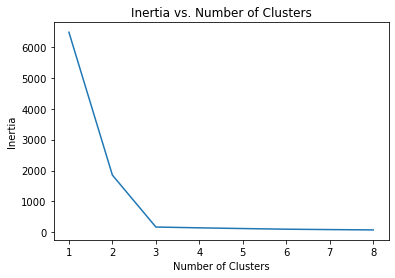

In [8]:
inertias = []
part2D_X, part2D_y = blobs_2
part2D_X = StandardScaler().fit_transform(part2D_X)
for k in sse_clusters:
    kmeans = KMeans(n_clusters = k, init = "random").fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(sse_clusters, inertias)
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

The optimal k from inertia is still k = 3 based on the elbow method, so the optimal k's agree.

# Problem 3
## Part A

In [29]:
#load the provided dataset
from scipy import io
toy_data = io.loadmat("hierarchical_toy_data.mat")

## Part B

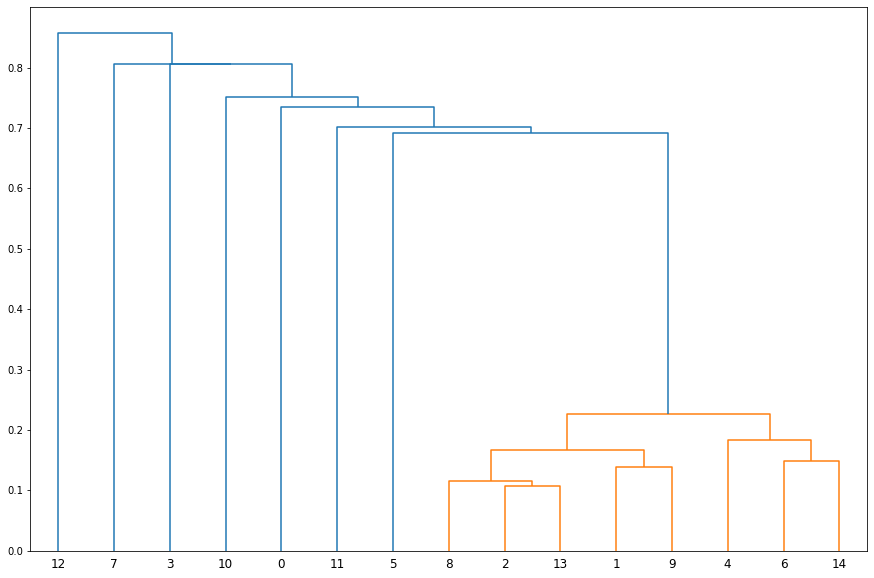

In [38]:
#Create a linkage matrix Z with single linkage
from scipy.cluster import hierarchy
Z = hierarchy.linkage(toy_data['X'], method = 'single')
plt.figure(figsize=(15,10))
dendo = hierarchy.dendrogram(Z)

## Part C

In [31]:
# Find the iteration I = {8, 2, 13} and J = {1, 9} were merged
Z

array([[ 2.        , 13.        ,  0.10777706,  2.        ],
       [ 8.        , 15.        ,  0.11566306,  3.        ],
       [ 1.        ,  9.        ,  0.13879878,  2.        ],
       [ 6.        , 14.        ,  0.14869505,  2.        ],
       [16.        , 17.        ,  0.16646191,  5.        ],
       [ 4.        , 18.        ,  0.18393601,  3.        ],
       [19.        , 20.        ,  0.22664301,  8.        ],
       [ 5.        , 21.        ,  0.69232603,  9.        ],
       [11.        , 22.        ,  0.70134235, 10.        ],
       [ 0.        , 23.        ,  0.73428364, 11.        ],
       [10.        , 24.        ,  0.75208442, 12.        ],
       [ 3.        , 25.        ,  0.80541514, 13.        ],
       [ 7.        , 26.        ,  0.80542732, 14.        ],
       [12.        , 27.        ,  0.85709025, 15.        ]])

Starting iterations at 0, clusters {8, 2, 13} and {1, 9} were merged at iteration 4.

## Part D

In [32]:
def dissimilarity(data, index_sets):
    X = data
    #Set the max dissimilarity to eventually chose the smallest one
    min_diss = 1
    #Check if both clusters are 1 element
    if np.size(index_sets[0]) == 1 and np.size(index_sets[1] == 1):
        i, j = index_sets
        diss = np.linalg.norm(X[i] - X[j])
        if diss < min_diss:
            min_diss = diss
    #Check if only the first cluster is 1 element
    elif np.size(index_sets[0]) == 1 and np.size(index_sets[1] != 1):
        i = index_sets[0]
        for j in index_sets[1]:
            diss = np.linalg.norm(X[i] - X[j])
            if diss < min_diss:
                min_diss = diss
    #Check if the second cluster is 1 element and the other one isn't
    elif np.size(index_sets[1]) == 1 and np.size(index_sets[0] != 1):
        j = index_sets[1]
        for i in index_sets[0]:
            diss = np.linalg.norm(X[i] - X[j])
            if diss < min_diss:
                min_diss = diss
    #All other variations
    else:
        for i in index_sets[0]:
            for j in index_sets[1]:
                diss = np.linalg.norm(X[i] - X[j])
                if diss < min_diss:
                    min_diss = diss
    print("The dissimilarity given by single link clustering for clusters {} and {} is: {}".format(index_sets[0], index_sets[1], min_diss))
    return min_diss

In [33]:
part3D = dissimilarity(toy_data['X'], ((2, 13, 8), (1, 9)))

The dissimilarity given by single link clustering for clusters (2, 13, 8) and (1, 9) is: 0.16646190977808642


## Part E

All available clusters when Part D was merged:  
{{8, 2, 13}, {1, 9}, {6, 14}, {0}, {3}, {4}, {5}, {7}, {10}, {11}, {12}}

## Part F

No, the algorithm does not ever produce two rings

## Part G

The dendogram does illustrate one cluster that is continuously merging with all available points

# Question 4
## Part A

In [34]:
from sklearn.cluster import AgglomerativeClustering
def fit_hier_cluster(dataset, linkage, num_clusters):
    data = StandardScaler().fit_transform(dataset)
    y_pred = AgglomerativeClustering(n_clusters = num_clusters, linkage = linkage).fit_predict(data)
    return y_pred

## Part B

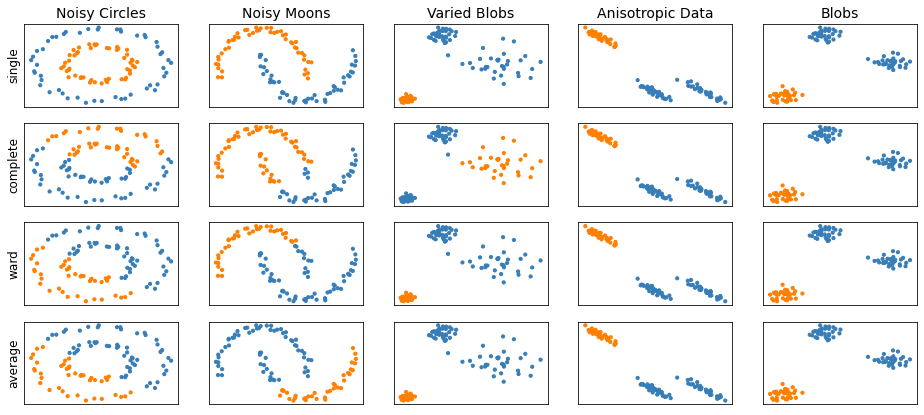

In [170]:
linkage_types = ["single", "complete", "ward", "average"]
plt.figure(figsize = (16, 7))
plot_num = 1

for i, k in enumerate(linkage_types):
    for ds_name, ds in datasets:
        X, y = ds
        y_pred = fit_hier_cluster(X, k, 2)
        #Create necessary subplot size (4 x 5)
        plt.subplot(len(linkage_types), len(datasets), plot_num)
        #Add titles to top row only
        if i == 0:
            plt.title(ds_name, size = 14)
        
        # Points colored by predicted label
        # FROM https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        plt.xticks(())
        plt.yticks(())
        #Add y labels to 
        if plot_num in [1, 6, 11, 16]:
                plt.ylabel("%s" % k, size = 12)
        plot_num += 1
        
plt.show()

For single linkage, it appears noisy circles and noisy moons are now correctly clustered where they were not with k-means.

## Part C

In [161]:
def fit_hier_cluster_distance(X, linkage, eps = 1e-5):
    X = StandardScaler().fit_transform(X)
    Z = hierarchy.linkage(X)
    diff = np.diff(Z[:,2])
    idx = np.argmax(diff)
    threshold = Z[idx, 2]
    model = AgglomerativeClustering(n_clusters=None, linkage = linkage, distance_threshold = threshold + eps, compute_distances=True).fit(X)
    y_pred = model.fit_predict(X)
    return y_pred

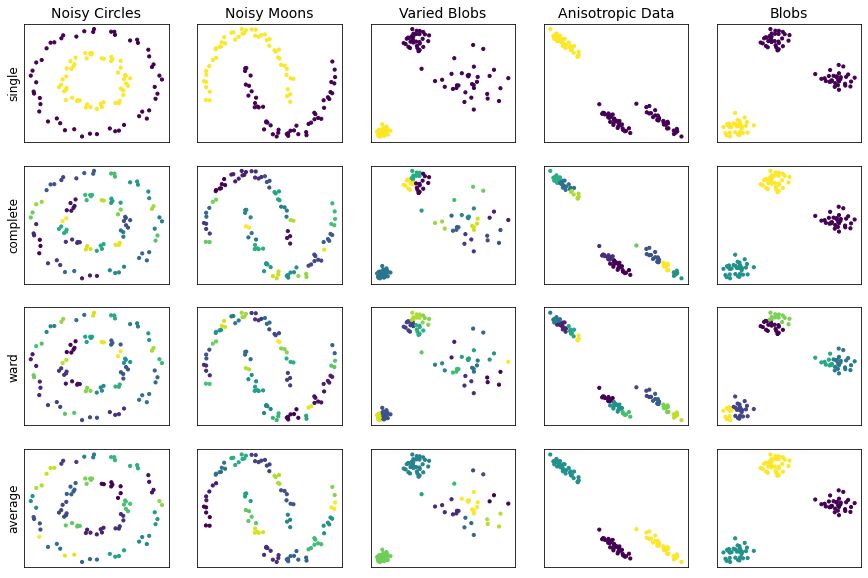

In [171]:
linkage_types = ["single", "complete", "ward", "average"]
plt.figure(figsize = (15,10))
plot_num = 1
for i, k in enumerate(linkage_types):
    for ds_name, ds in datasets:
        X, y = ds
        y_pred = fit_hier_cluster_distance(X, k)
        #Create necessary subplot size (4 x 5)
        plt.subplot(4, 5, plot_num)
        #Add titles to top row only
        if (i == 0):
            plt.title(ds_name, size = 14)

        # Points colored by predicted label
        # FROM https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)
        plt.xticks(())
        plt.yticks(())
        #Add y labels to 
        if plot_num in [1, 6, 11, 16]:
                plt.ylabel("%s" % k, size = 12)
        plot_num += 1
        
plt.show()